In [83]:
from torch import nn, optim
import numpy as np
import pickle as p
import torch
from tqdm.notebook import trange
from tqdm import tqdm
import matplotlib.pyplot as plt

from network import ConvNet
from resnet import ResNet
from sklearn.metrics import f1_score
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from dataset import CogDatasetTest
from meanAveragePrecision import computeMeanAveragePrecision

ImportError: cannot import name 'CogDatasetTest' from 'dataset' (/Users/annka/Programming/Uni/MedDatSci/CogActivity/dataset.py)

In [74]:
# function for training and evaluation
def test(model, test_dataloader):
    accuracies = []
    f1_scores = []
    softmax_scores = []

    with torch.no_grad():

        model.eval()

        running_accuracy = 0.0
        running_f1 = 0.0

        for input, target in test_dataloader:
            
            output = model(input)

            prediction = torch.argmax(output, dim=1).float() 
            softmax = torch.softmax(output, dim=1)

            for o, t in zip(prediction, target):
                if o == t:
                    running_accuracy+=1/(len(test_dataloader)*batch_size)
                
            #running_f1 += f1_score(target, prediction)

            #running_f1 /= len(val_dataloader)

            accuracies.append(running_accuracy)
            #f1_val.append(running_f1)
            softmax_scores.append(softmax.tolist())

            # output
            if len(accuracies) % 20 == 0:
                tqdm.write('No. {} (test) -- acc: {:.4f}'.format(len(accuracies), running_accuracy))

        softmax_scores = np.asarray(softmax_scores)
        print(softmax_scores.shape)

        mean_avg_precision = computeMeanAveragePrecision(labels, np.asarray(softmax_scores))

        # print last value of metrics
        #tqdm.write('Final accuracy: {:.4f}, mean avg precision {:.4f}'.format(running_accuracy, mean_avg_precision))


    # make metrics callable outside this function
    test.accuracy = accuracies
    # test.f1_score = f1_scores
    test.mean_avg_precision = mean_avg_precision

In [80]:
# load data and label files
# shape = [2284, 200, 3, 9] --> [datasets, time series, channels, devices]
data = p.load(open(r"data/test.pkl", "rb"))
labels = p.load(open(r"data/labels_test.pkl", "rb"))
print(data.shape)
print(labels.shape)

#reshape data into datasets x (channels x devices) x time series 
data = data.transpose((0,1,3,2))
data = data.reshape(data.shape[0], -1, data.shape[3])
print(data.shape)

batch_size = 1
# create datasets
test_dataset = CogDatasetTest(data, labels, train=False)
test_dataloader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)
print(len(test_dataloader))

(2288, 8, 200, 3)
(2288,)
(2288, 24, 200)


NameError: name 'CogDatasetTest' is not defined

In [4]:
# load model for testing
net_num = 1
model = ResNet()
model.load_state_dict(torch.load("trained_models/net_" + str(net_num) + ".pt"))

<All keys matched successfully>

In [76]:
# test model
test(model.double(), test_dataloader)

No. 20 (test) -- acc: 0.0218
No. 40 (test) -- acc: 0.0568
No. 60 (test) -- acc: 0.0830
No. 80 (test) -- acc: 0.1114
No. 100 (test) -- acc: 0.1441
No. 120 (test) -- acc: 0.1725
No. 140 (test) -- acc: 0.1943
No. 160 (test) -- acc: 0.2271
No. 180 (test) -- acc: 0.2576
No. 200 (test) -- acc: 0.2904
No. 220 (test) -- acc: 0.3275
No. 240 (test) -- acc: 0.3559
No. 260 (test) -- acc: 0.3734
No. 280 (test) -- acc: 0.3996
No. 300 (test) -- acc: 0.4236
No. 320 (test) -- acc: 0.4541
No. 340 (test) -- acc: 0.4803
No. 360 (test) -- acc: 0.5131
No. 380 (test) -- acc: 0.5393
No. 400 (test) -- acc: 0.5699
No. 420 (test) -- acc: 0.6026
No. 440 (test) -- acc: 0.6332
(458, 1, 55)


ValueError: too many values to unpack (expected 2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


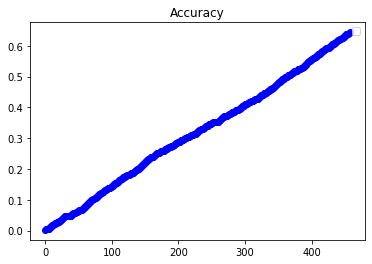

In [ ]:
# plot metrics

# accuracy
plt.scatter(np.arange(len(test.accuracy)), test.accuracy, color="b")
plt.title("Accuracy")
plt.legend()
plt.show()